In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


data = pd.read_csv("Amazon Customer Behavior Survey.csv")


print("Data Head:")
print(data.head())



Data Head:
                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                

In [42]:

if 'Customer ID' in data.columns:
    data = data.drop('Customer ID', axis=1)


data = data.select_dtypes(include=[np.number])


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)




Explained Variance Ratio: [0.44397168 0.20394925]


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

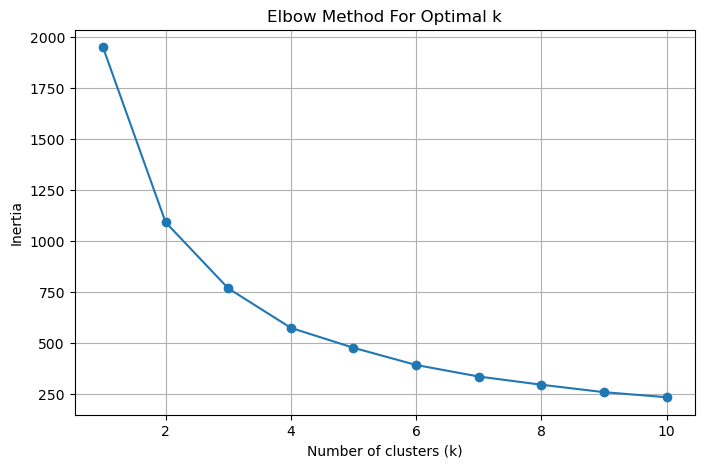

In [43]:
# Elbow Method to Find Optimal Number of Clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()




/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

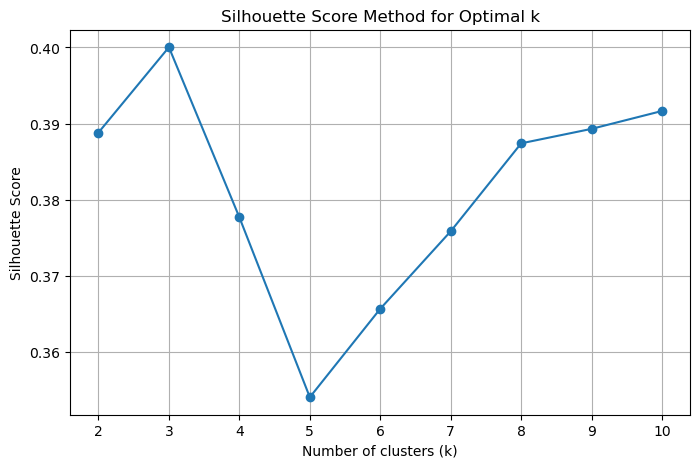

In [44]:
# Silhouette Method

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_pca)
    score = silhouette_score(data_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


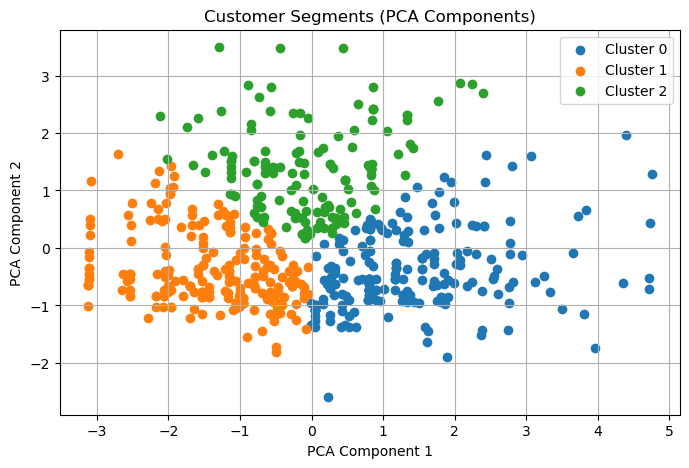


Cluster Summary:
               age  Customer_Reviews_Importance  \
Cluster                                           
0        26.584746                     3.110169   
1        26.789238                     1.614350   
2        43.972028                     2.790210   

         Personalized_Recommendation_Frequency   Rating_Accuracy   \
Cluster                                                             
0                                      3.411017          3.279661   
1                                      2.040359          2.121076   
2                                      2.552448          2.531469   

         Shopping_Satisfaction  
Cluster                         
0                     3.245763  
1                     1.668161  
2                     2.412587  


In [45]:

k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(data_pca)


data['Cluster'] = clusters


plt.figure(figsize=(8,5))
for cluster in range(k_optimal):
    plt.scatter(data_pca[clusters == cluster, 0], data_pca[clusters == cluster, 1], label=f'Cluster {cluster}')

plt.title('Customer Segments (PCA Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Cluster Summary Statistics
print("\nCluster Summary:")
print(data.groupby('Cluster').mean())



In [46]:

data = data.drop(index=[442, 578])


data_scaled = scaler.fit_transform(data)


data_pca = pca.fit_transform(data_scaled)


kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(data_pca)


data['Cluster'] = clusters


data = data.rename(columns={"Personalized_Recommendation_Frequency": "Personalized_Recommendation_Usage", "Personalized_Recommendation_Frequency ": "Personalized_Recommendation_Frequency", "Rating_Accuracy ": "Rating_Accuracy"})


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:

numerical_features = ['age', 'Customer_Reviews_Importance', 'Personalized_Recommendation_Frequency', 'Rating_Accuracy', 'Shopping_Satisfaction']
categorical_features = data.select_dtypes(include=['object'])

In [48]:

numerical_mean = data.groupby('Cluster')[numerical_features].mean()
print("Numerical Features Mean:")
numerical_mean

Numerical Features Mean:


,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
Cluster,,,,,
0,26.789238,1.614350,2.040359,2.121076,1.668161
1,43.972028,2.790210,2.552448,2.531469,2.412587
2,26.747863,3.111111,3.414530,3.277778,3.247863


In [49]:

numerical_median = data.groupby('Cluster')[numerical_features].median()
print("Numerical Features Median:")
numerical_median

Numerical Features Median:


,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
Cluster,,,,,
0,25.0,1.0,2.0,2.0,2.0
1,45.0,3.0,3.0,3.0,2.0
2,24.0,3.0,3.0,3.0,3.0


In [50]:
numerical_summary = data.groupby('Cluster')[numerical_features].mean()

In [51]:
# Categorical value counts with a more readable format and fills any missing values with zero
categorical_summary = {}

for feature in categorical_features:
    summary = data.groupby('Cluster')[feature].value_counts(normalize=True).unstack().fillna(0)
    categorical_summary[feature] = summary

In [52]:
#Personas
personas = []

for cluster_id in numerical_summary.index:
    persona = {
        'Cluster': cluster_id,
        'Description': f'Persona for Cluster {cluster_id}',
        'Numerical_Features': numerical_summary.loc[cluster_id].to_dict(),
        'Categorical_Features': {feature: categorical_summary[feature].loc[cluster_id].idxmax() for feature in categorical_features}
    }
    personas.append(persona)


for persona in personas:
    print(f"\n{persona['Description']}:")
    for char, value in persona['Numerical_Features'].items():
        print(f"  {char}: {value:.2f}")
    for char, value in persona['Categorical_Features'].items():
        print(f"  {char}: {value}")



Persona for Cluster 0:
  age: 26.79
  Customer_Reviews_Importance: 1.61
  Personalized_Recommendation_Frequency: 2.04
  Rating_Accuracy: 2.12
  Shopping_Satisfaction: 1.67

Persona for Cluster 1:
  age: 43.97
  Customer_Reviews_Importance: 2.79
  Personalized_Recommendation_Frequency: 2.55
  Rating_Accuracy: 2.53
  Shopping_Satisfaction: 2.41

Persona for Cluster 2:
  age: 26.75
  Customer_Reviews_Importance: 3.11
  Personalized_Recommendation_Frequency: 3.41
  Rating_Accuracy: 3.28
  Shopping_Satisfaction: 3.25
